In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Alzheimers Data

In [2]:
# Load the CSV file into a DataFrame
alzheimers_data = pd.read_csv('/Users/Student/Library/Mobile Documents/com~apple~CloudDocs/SETU/Sem 2/Data Analytics and Algorithms/Assignment/Implementation/Data-Science-Implementation/Code/alzheimers_cleaned_data.csv')
alzheimers_data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


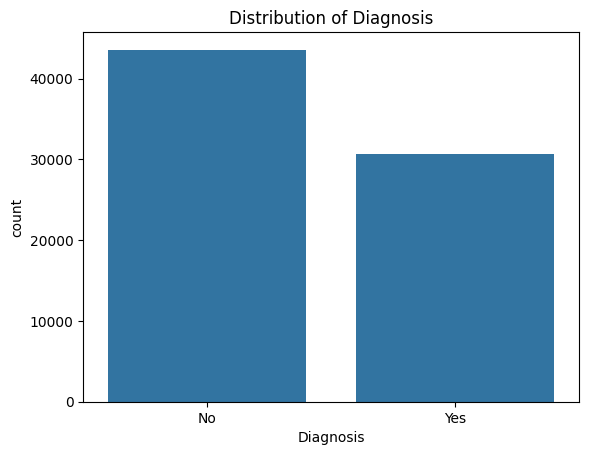

In [3]:
# Plot the distribution of the Diagnosis column
sns.countplot(x='Diagnosis', data=alzheimers_data)
plt.title('Distribution of Diagnosis')
plt.show()

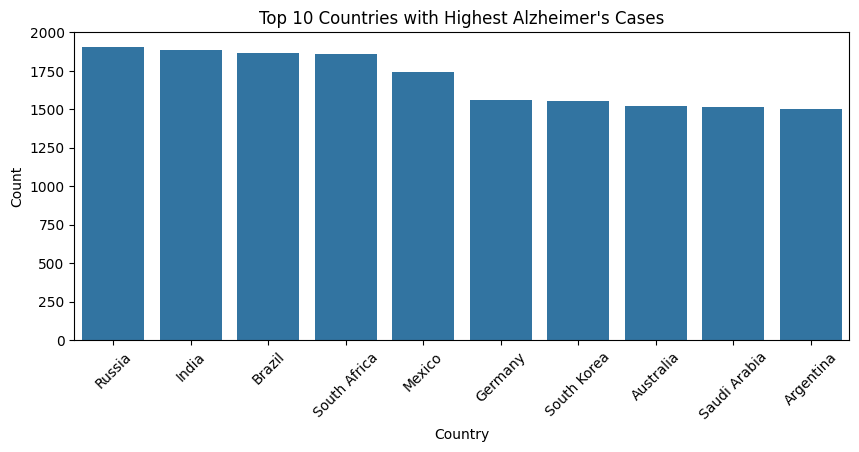

In [4]:
# Plot the top 10 countries with the highest Alzheimer's cases
plt.figure(figsize=(10, 4))
top_countries = alzheimers_data[alzheimers_data["Diagnosis"] == "Yes"]["Country"].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries with Highest Alzheimer's Cases")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

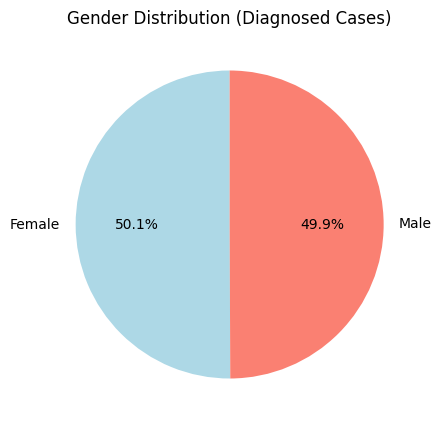

In [5]:
# Plot the gender distribution for diagnosed cases
plt.figure(figsize=(5, 5))
data_counts = alzheimers_data[alzheimers_data["Diagnosis"] == "Yes"]["Gender"].value_counts()
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
plt.title("Gender Distribution (Diagnosed Cases)")
plt.show()

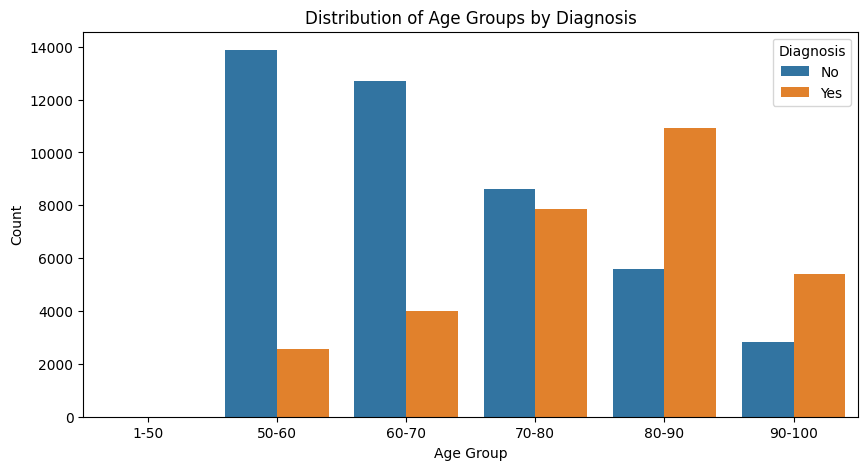

In [6]:
# Plot the distribution of age groups by diagnosis

# Define the age bins and labels
age_bins = [0, 50, 60, 70, 80, 90, 100]
age_labels = ['1-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a temporary column for age groups
alzheimers_data['Temp Age Group'] = pd.cut(alzheimers_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the distribution of the Temp Age Group column with a multibar plot for Diagnosis
plt.figure(figsize=(10, 5))
sns.countplot(x='Temp Age Group', hue='Diagnosis', data=alzheimers_data)
plt.title('Distribution of Age Groups by Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

# Drop the temporary column
alzheimers_data.drop(columns=['Temp Age Group'], inplace=True)

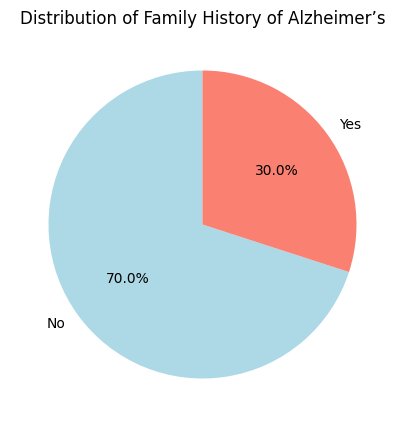

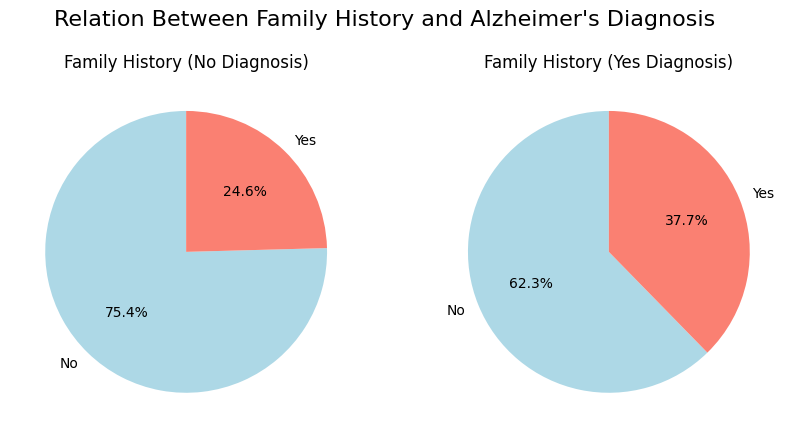

In [7]:
# Plot the distribution of the Family History of Alzheimer’s column
plt.figure(figsize=(10,5))
family_history_counts = alzheimers_data['Family History of Alzheimer’s'].value_counts()
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
plt.title("Distribution of Family History of Alzheimer’s")
plt.show()

# Plot the relation between family history and diagnosis in 2 pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for 'No' diagnosis
no_diagnosis_counts = alzheimers_data[alzheimers_data['Diagnosis'] == 'No']['Family History of Alzheimer’s'].value_counts()
axes[0].pie(no_diagnosis_counts, labels=no_diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
axes[0].set_title("Family History (No Diagnosis)")

# Pie chart for 'Yes' diagnosis
yes_diagnosis_counts = alzheimers_data[alzheimers_data['Diagnosis'] == 'Yes']['Family History of Alzheimer’s'].value_counts()
axes[1].pie(yes_diagnosis_counts, labels=yes_diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "salmon"])
axes[1].set_title("Family History (Yes Diagnosis)")

# Add a main title
fig.suptitle("Relation Between Family History and Alzheimer's Diagnosis", fontsize=16)

plt.show()


/var/folders/mp/lq1n259d1hndgjvtwyv4fccr0000gn/T/ipykernel_1701/756679910.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_diagnosis_counts = alzheimers_data.groupby(['BMI Category', 'Diagnosis']).size().unstack()


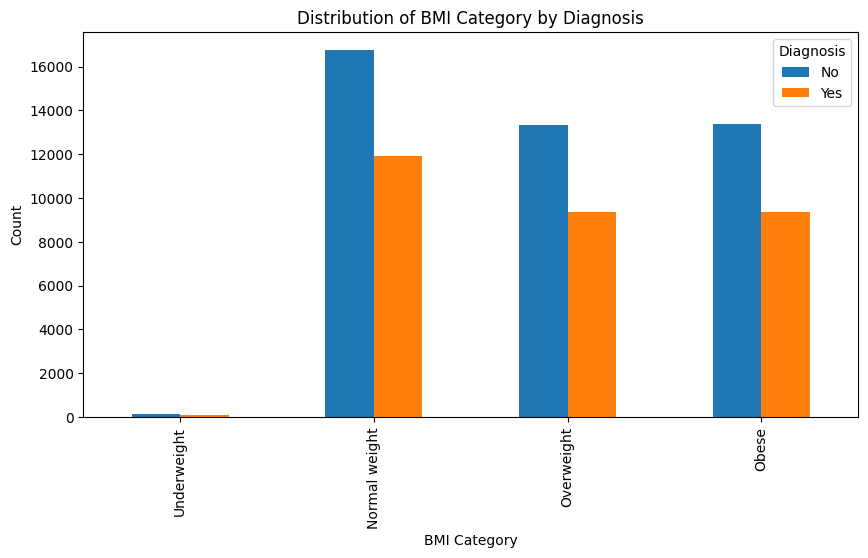

In [8]:
# Categorize BMI and plot the distribution by diagnosis
alzheimers_data['BMI Category'] = pd.cut(alzheimers_data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

# Plot the distribution of BMI Category by Diagnosis with a grouped bar plot
plt.figure(figsize=(10, 5))
bmi_diagnosis_counts = alzheimers_data.groupby(['BMI Category', 'Diagnosis']).size().unstack()
bmi_diagnosis_counts.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of BMI Category by Diagnosis')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

In [9]:
# Identify numerical columns
numerical_columns = alzheimers_data.select_dtypes(include=['float64', 'int64']).columns

# Identify categorical columns
categorical_columns = alzheimers_data.select_dtypes(include=['object', 'category']).columns

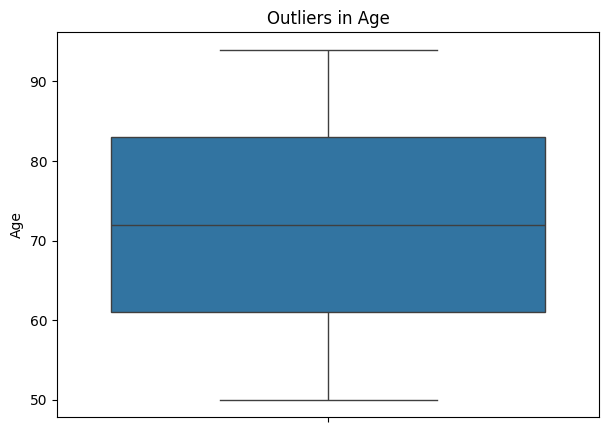

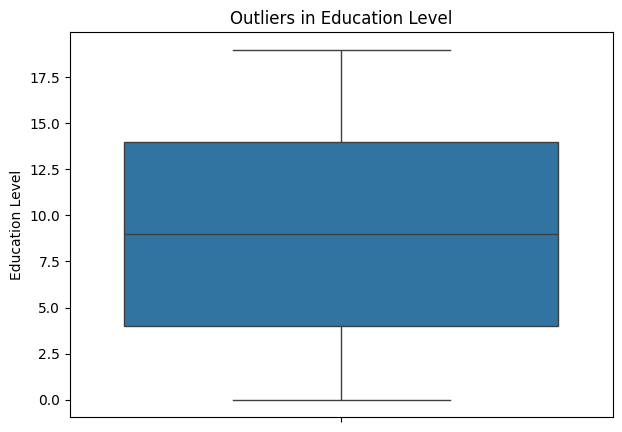

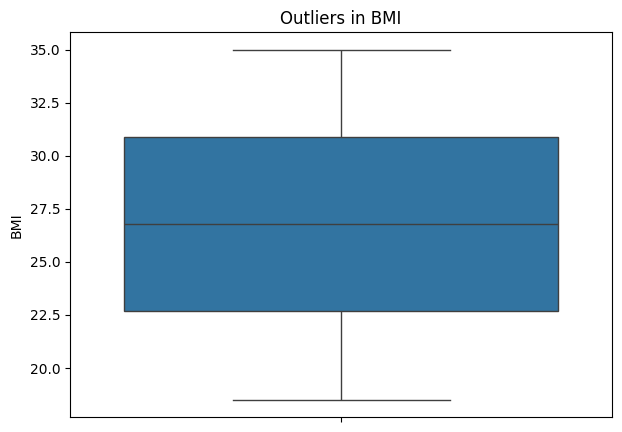

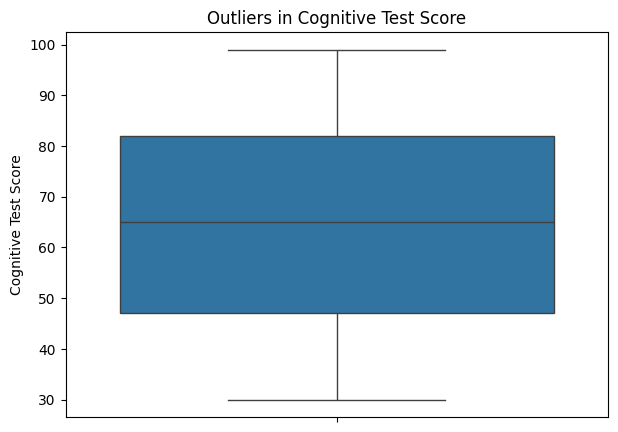

In [10]:
# Outlier Detection
for feature in numerical_columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=alzheimers_data[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

# Student Performance Data

In [3]:
# Load the CSV file into a DataFrame
student_performance_data = pd.read_csv('/Users/Student/Library/Mobile Documents/com~apple~CloudDocs/SETU/Sem 2/Data Analytics and Algorithms/Assignment/Implementation/Data-Science-Implementation/Code/student_performance_cleaned_data.csv')
student_performance_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


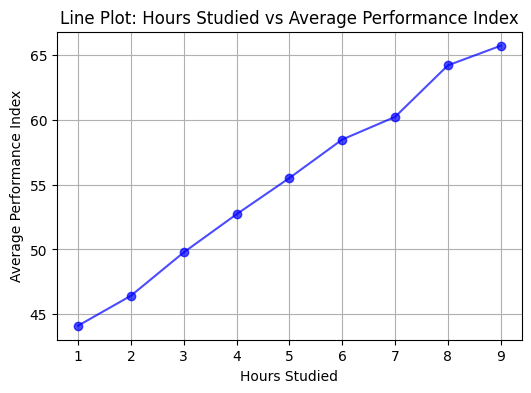

In [6]:
#Relation between hours studied and performance index

# Group by Hours Studied and calculate the average Performance Index
df_grouped_hours = student_performance_data.groupby('Hours Studied')['Performance Index'].mean()

# Create a line plot
plt.figure(figsize=(6,4))
df_grouped_hours.plot(kind='line', marker='o', linestyle='-', color='blue', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Line Plot: Hours Studied vs Average Performance Index')
plt.grid(True)
plt.show()

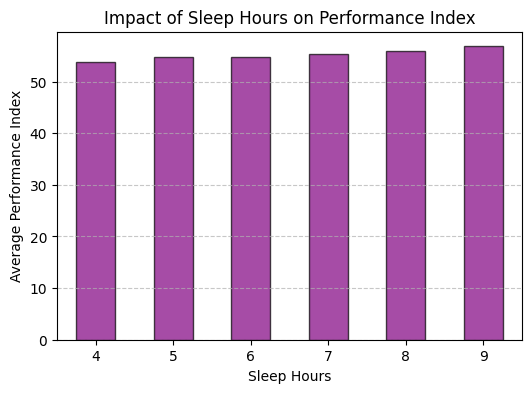

In [7]:
#Sleep hours and performance index

# Group by Sleep Hours and calculate the average Performance Index
df_grouped_sleep = student_performance_data.groupby('Sleep Hours')['Performance Index'].mean()

# Create a bar plot
plt.figure(figsize=(6,4))
df_grouped_sleep.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Performance Index')
plt.title('Impact of Sleep Hours on Performance Index')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

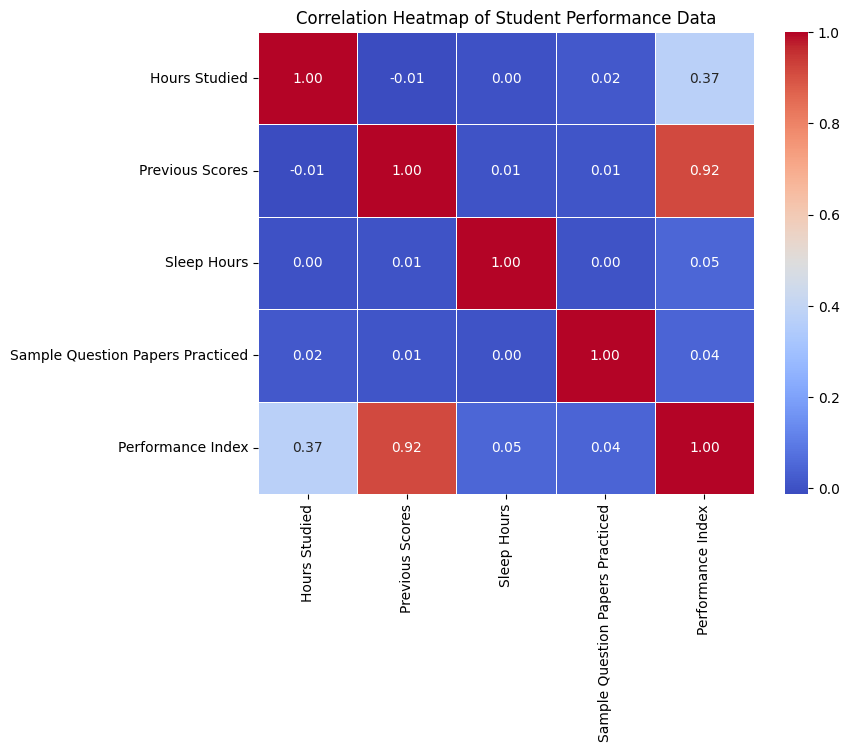

In [8]:
# Create a correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(student_performance_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Student Performance Data')
plt.show()

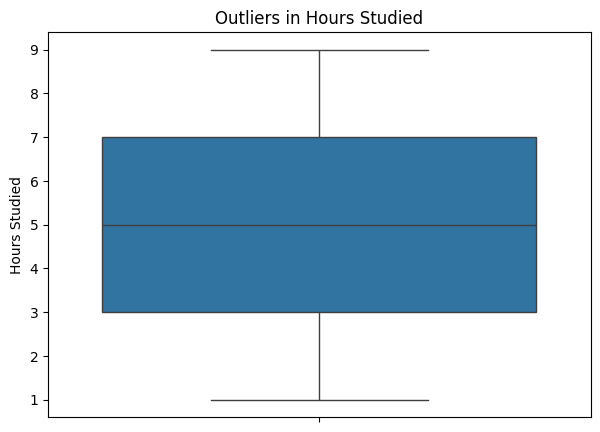

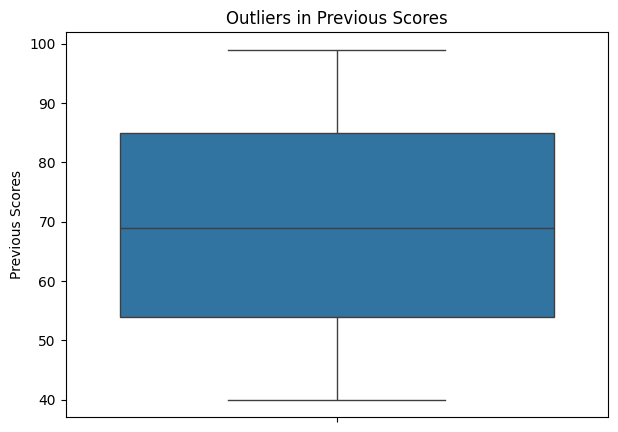

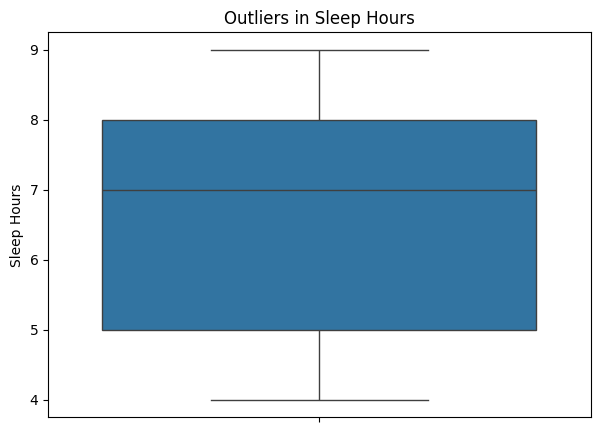

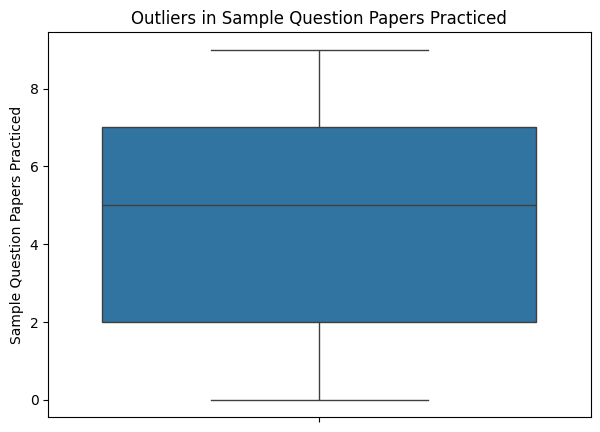

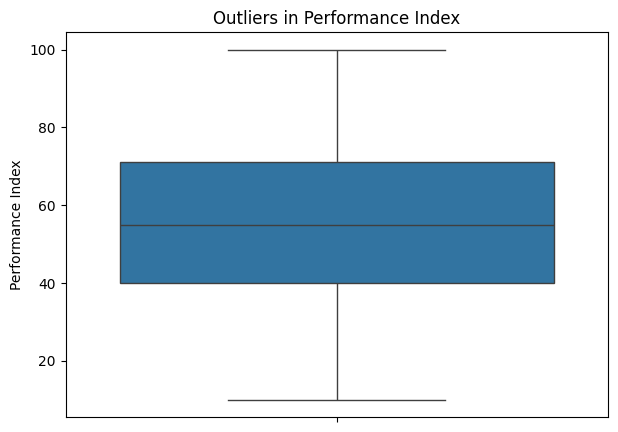

In [9]:
# Identify numerical columns in student_performance_data
numerical_columns_student = student_performance_data.select_dtypes(include=['float64', 'int64']).columns

# Outlier Detection for student_performance_data
for feature in numerical_columns_student:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=student_performance_data[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()